# Building Simple Neural Network Model

In [129]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [130]:
# Create base model

class FlowerClassifierModel(nn.Module):
    """A simple model that classify flower type class

    Args:
        input_features (int): default 4
        first_hidden_layer (int): default 9
        second_hidden_layer (int): default 10
        output_class (init): default 3
    """
    def __init__(self, input_features=4,first_hidden_layer_n=8, second_hidden_layer_n=9, output_class=3):
        super().__init__() # instantiae the parent class, Module
        self.fc1 = nn.Linear(input_features, first_hidden_layer_n)
        self.fc2 = nn.Linear(first_hidden_layer_n, second_hidden_layer_n)
        self.output_class_result = nn.Linear(second_hidden_layer_n, output_class)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.output_class_result(x))
        return x

In [131]:
flower_classifer = FlowerClassifierModel()

In [132]:
flower_classifer.parameters

<bound method Module.parameters of FlowerClassifierModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (output_class_result): Linear(in_features=9, out_features=3, bias=True)
)>

In [133]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt


In [134]:
flower_trainning_data = load_iris()

In [135]:
data = flower_trainning_data['data']
target = flower_trainning_data['target']
target_names = flower_trainning_data['target_names']


In [136]:
from sklearn.model_selection import train_test_split


In [137]:
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.2, random_state=30)

In [138]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [139]:
# Create loss function to track loss
loss_function = nn.CrossEntropyLoss()

# Add optimiser with learning rate at 0.01
optimiser = torch.optim.Adam(flower_classifer.parameters(), lr=0.01)

## Train model

In [140]:
losses = []
epochs = 200 # how many time to iterate in traning model

for epoch in range(epochs):

    y_predicted = flower_classifer.forward(X_train)
    loss = loss_function(y_predicted, y_train)

    losses.append(loss.detach().numpy())
    
    # predict for each iteration
    print(f"Iter {epoch}: {y_predicted.max()} \t{loss}")

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()


Iter 0: 0.32711198925971985 	1.1027826070785522
Iter 1: 0.25731977820396423 	1.100557804107666
Iter 2: 0.21101859211921692 	1.0991950035095215
Iter 3: 0.16764459013938904 	1.0983680486679077
Iter 4: 0.13591383397579193 	1.098042368888855
Iter 5: 0.11866864562034607 	1.0976123809814453
Iter 6: 0.11211623251438141 	1.097048044204712
Iter 7: 0.11453860253095627 	1.0963155031204224
Iter 8: 0.12220756709575653 	1.0935035943984985
Iter 9: 0.13168254494667053 	1.0909428596496582
Iter 10: 0.14642953872680664 	1.0879944562911987
Iter 11: 0.16860787570476532 	1.0847642421722412
Iter 12: 0.19749604165554047 	1.0814179182052612
Iter 13: 0.2473081350326538 	1.077724575996399
Iter 14: 0.306378573179245 	1.0735039710998535
Iter 15: 0.3722071647644043 	1.0687655210494995
Iter 16: 0.4457664489746094 	1.0637372732162476
Iter 17: 0.5276474356651306 	1.0584431886672974
Iter 18: 0.6182918548583984 	1.0528396368026733
Iter 19: 0.7179446220397949 	1.046888828277588
Iter 20: 0.8266234993934631 	1.040525317192

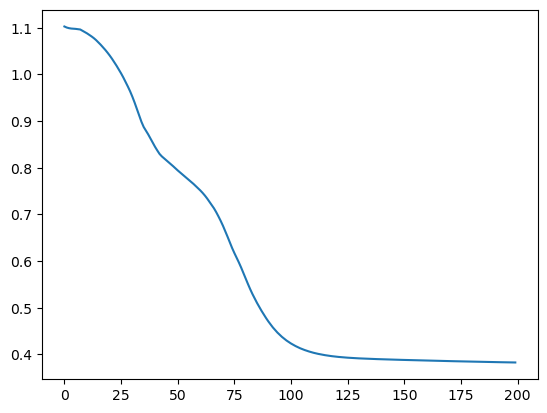

In [141]:
plt.plot(range(epochs) , losses)

In [142]:
# Evaluate  model by first stopping backpropagation
with torch.no_grad():
    y_eval = flower_classifer.forward(X_test)
    loss = loss_function(y_eval, y_test)

loss

tensor(0.5429)

In [143]:
# Check how many is correct
correct = 0 
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_eval = flower_classifer.forward(data)

        print(f'{y_eval} \t {y_test[i]}')

        if y_eval.argmax().item()  == y_test[i]:
            correct += 1
print(f'Number of correct outcome is {correct}')

tensor([0., 0., 0.]) 	 0
tensor([0., 0., 0.]) 	 0
tensor([0., 0., 0.]) 	 0
tensor([ 0.0000,  6.6122, 14.5593]) 	 2
tensor([0.0000, 7.3556, 0.0000]) 	 1
tensor([0.0000, 7.2429, 0.0000]) 	 1
tensor([ 0.0000,  7.5848, 10.0664]) 	 2
tensor([ 0.0000,  6.8924, 15.8582]) 	 2
tensor([0.0000, 8.1736, 0.3542]) 	 1
tensor([ 0.0000,  8.9195, 16.3627]) 	 2
tensor([0., 0., 0.]) 	 0
tensor([ 0.0000,  7.6009, 14.4415]) 	 2
tensor([0.0000, 6.1551, 0.0000]) 	 1
tensor([0.0000, 7.7899, 0.0855]) 	 1
tensor([0., 0., 0.]) 	 0
tensor([0.0000, 8.1450, 0.3341]) 	 1
tensor([0., 0., 0.]) 	 0
tensor([0., 0., 0.]) 	 0
tensor([0., 0., 0.]) 	 0
tensor([0.0000, 8.3081, 7.2399]) 	 1
tensor([0.0000, 8.4048, 7.3248]) 	 2
tensor([0., 0., 0.]) 	 0
tensor([0., 0., 0.]) 	 0
tensor([0., 0., 0.]) 	 0
tensor([ 0.0000,  8.5462, 20.9313]) 	 2
tensor([ 0.0000,  6.6353, 19.6281]) 	 2
tensor([0.0000, 7.2316, 8.2710]) 	 1
tensor([ 0.0000,  6.1922, 19.6150]) 	 2
tensor([0., 0., 0.]) 	 0
tensor([0.0000, 8.8077, 1.8649]) 	 1
Number of 

In [144]:
 # Test model with new data input
new_input = torch.tensor([34.3, 3.2, 5.3, 4.2])

with torch.no_grad():
    result = flower_classifer.forward(new_input)
    resultname = target_names[result.argmax().item()]
    print(f'Flower type is: {resultname}')

Flower type is: versicolor


In [145]:
# Save model for future use

torch.save(flower_classifer.state_dict(), 'ires_flower_classifier_model.pt')

In [146]:
# Load saved model
new_model_instance = FlowerClassifierModel()

new_model_instance.load_state_dict(torch.load('ires_flower_classifier_model.pt'))

<All keys matched successfully>

In [147]:
new_model_instance.eval()

FlowerClassifierModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (output_class_result): Linear(in_features=9, out_features=3, bias=True)
)